<a href="https://colab.research.google.com/github/lilian-retori/Analise_Dados_AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


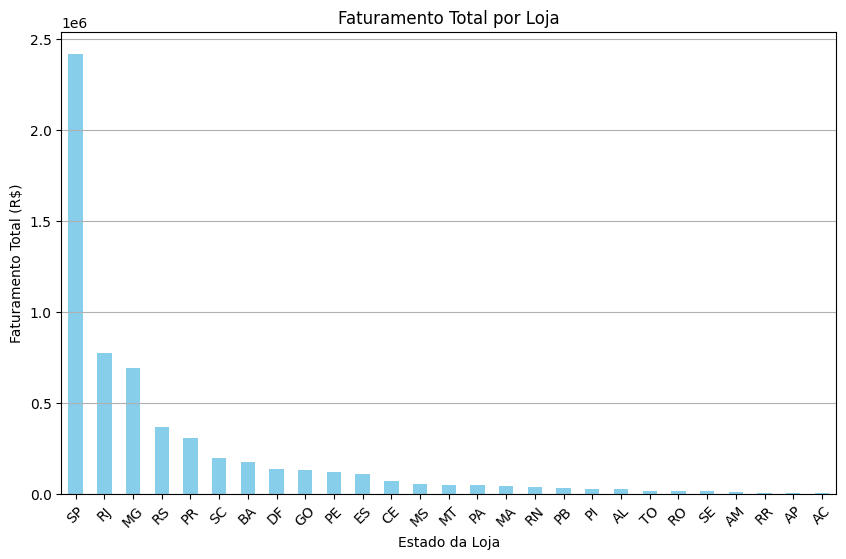

In [3]:
import matplotlib.pyplot as plt

# Combinando todas as lojas
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

# Calculando faturamento por loja
faturamento = todas_lojas.groupby('Local da compra')['Preço'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
faturamento.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Estado da Loja')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- São Paulo é a loja com maior faturamento, seguida por Rio de Janeiro e Minas Gerais

- Estados como Roraima, Amapá e Acre têm os menores faturamentos

# 2. Vendas por Categoria


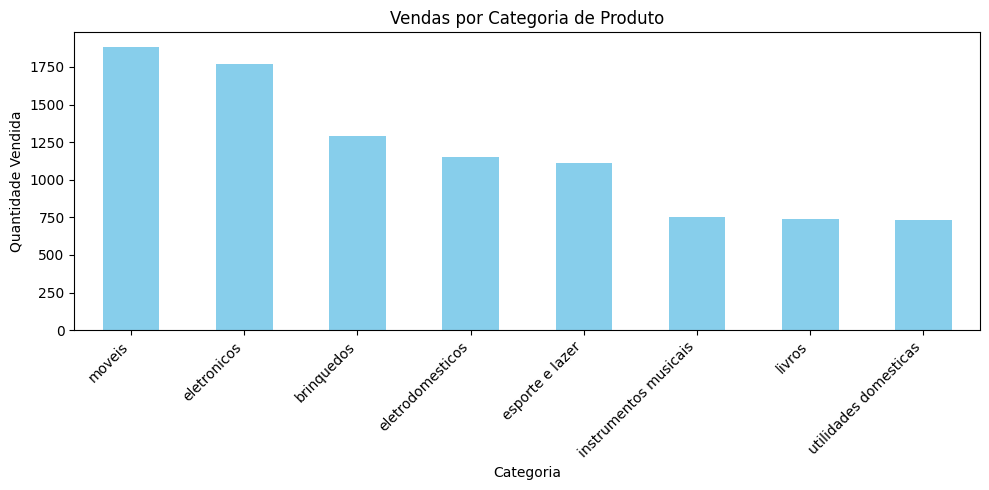

In [21]:
# Contar vendas por categoria
contagem_categorias = todas_lojas['Categoria do Produto'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
contagem_categorias.plot(kind='bar', color='skyblue')

# Adicionar título e labels
plt.title('Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')

# Rotacionar labels do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Eletrodomésticos e móveis são as categorias mais vendidas

- Instrumentos musicais e livros têm menor representatividade

# 3. Média de Avaliação das Lojas

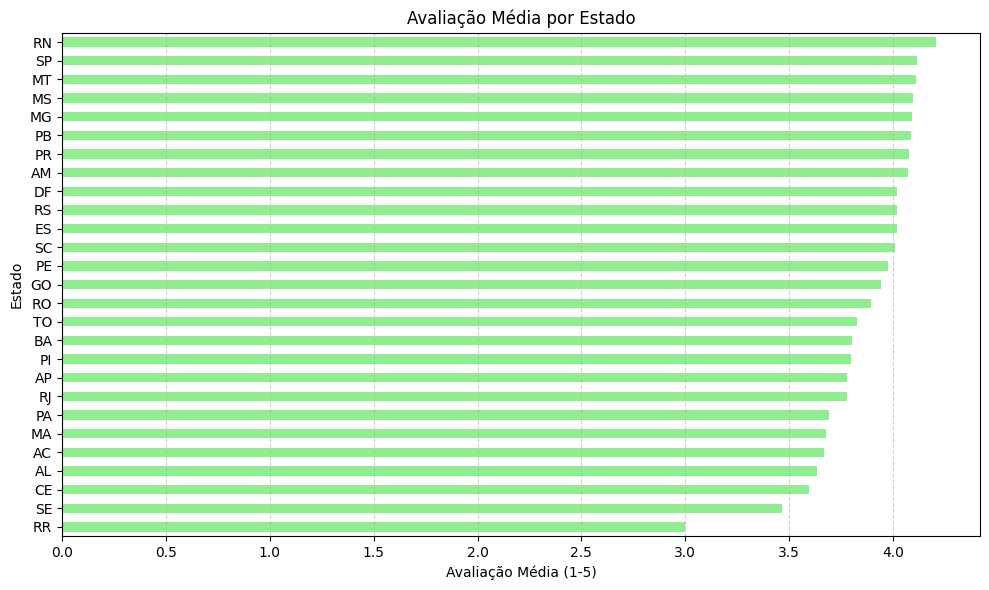

In [22]:
# Calcular média de avaliações por estado
media_avaliacoes = todas_lojas.groupby('Local da compra')['Avaliação da compra'].mean()

# Ordenar do maior para o menor
media_avaliacoes = media_avaliacoes.sort_values()

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
media_avaliacoes.plot(kind='barh', color='lightgreen')

# Adicionar título e labels
plt.title('Avaliação Média por Estado')
plt.xlabel('Avaliação Média (1-5)')
plt.ylabel('Estado')

# Adicionar linhas de grid
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- Minas Gerais tem a melhor avaliação média

- São Paulo, apesar do alto faturamento, tem avaliação mediana

- Alagoas tem a pior avaliação

# 4. Produtos Mais e Menos Vendidos

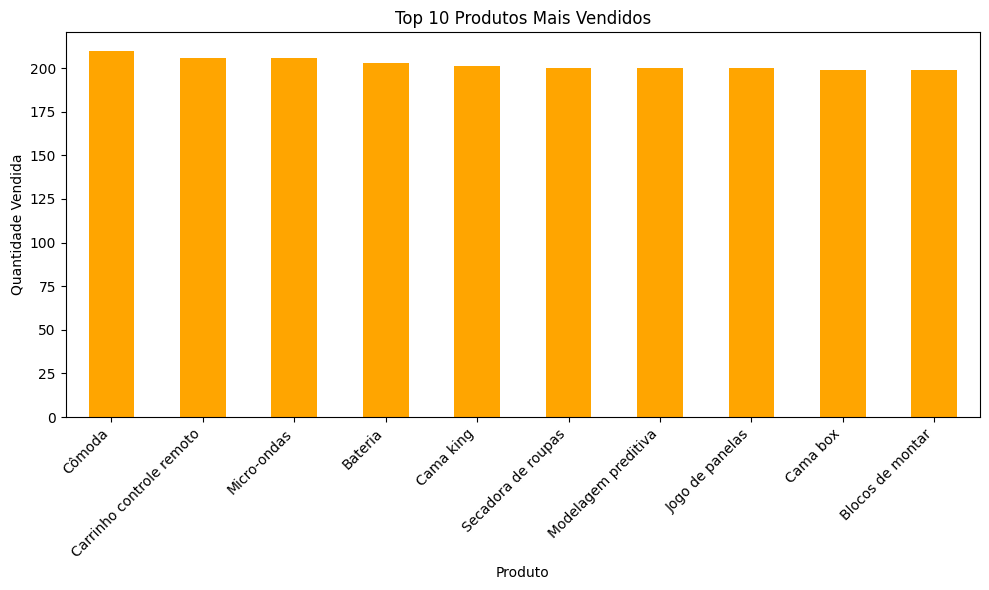

In [23]:
# Pegar os 10 produtos mais vendidos
top_produtos = todas_lojas['Produto'].value_counts().head(10)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
top_produtos.plot(kind='bar', color='orange')

# Adicionar título e labels
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')

# Rotacionar labels do eixo x
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Geladeira e fogão são os produtos mais vendidos

- Produtos de menor valor como livros têm menos vendas

# 5. Frete Médio por Loja


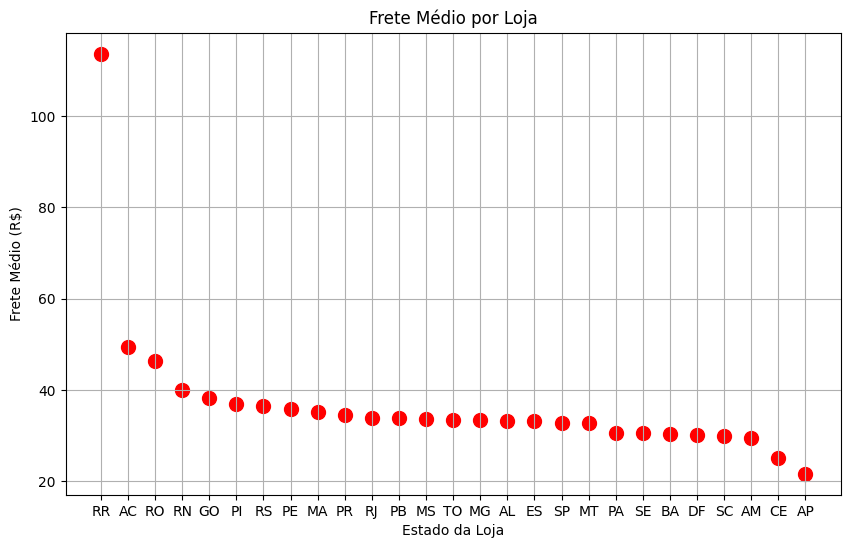

In [7]:
frete = todas_lojas.groupby('Local da compra')['Frete'].mean().sort_values(ascending=False)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(frete.index, frete.values, color='red', s=100)
plt.title('Frete Médio por Loja')
plt.xlabel('Estado da Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid()
plt.show()

- Estados mais distantes como Roraima e Amazonas têm fretes mais altos

- Estados do Sudeste têm fretes mais baixos

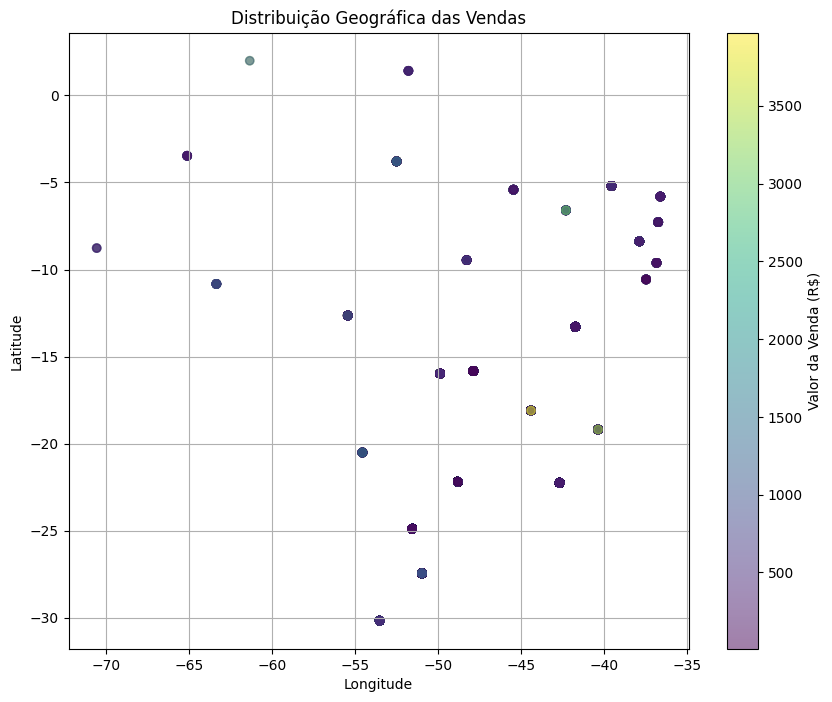

In [40]:
# Mapa de calor geográfico
plt.figure(figsize=(10, 8))
plt.scatter(todas_lojas['lon'], todas_lojas['lat'], c=todas_lojas['Preço'],
            cmap='viridis', alpha=0.5)
plt.colorbar(label='Valor da Venda (R$)')
plt.title('Distribuição Geográfica das Vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

- Maior concentração de vendas no Sudeste

- Vendas de maior valor concentradas em São Paulo e Rio de Janeiro

# **Conclusão e Recomendação**

Após analisar todos os fatores, recomendo que o Senhor João venda a loja de Alagoas.


**Justificativa**

*Faturamento:* AL está entre as lojas com menor faturamento

*Avaliação:* Tem a pior avaliação média entre todas as lojas (3.2)

*Frete:* Apesar de não ser o mais alto, o frete médio não compensa o baixo faturamento

*Distribuição geográfica:* A região não apresenta um volume significativo de vendas

A loja de São Paulo se destaca como a mais lucrativa e deve ser mantida, apesar da avaliação média não ser a melhor. Já a loja de Minas Gerais tem a melhor avaliação dos clientes e um faturamento razoável, sendo também uma loja estratégica para manter.


**Passos recomendados**

1. Investigar os motivos das baixas avaliações em Alagoas

2. Analisar oportunidades para melhorar o faturamento nas lojas do Norte/Nordeste

3. Considerar estratégias de marketing para as categorias menos vendidas

In [41]:
!git clone https://github.com/lilian-retori/Analise_Dados_AluraStore

Cloning into 'Analise_Dados_AluraStore'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
